# Load the MNIST dataset

https://www.tensorflow.org/api_docs/python/tf/keras/datasets/mnist/load_data

In [1]:
import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

# Load recorded events list from .pickle file

In [425]:
# Set params value for .pkl file name:

fr_ev_th=8
mnist_sym_start=6000
mnist_sym_end=11999
frame_size = 16
# list_np_fr = [[] for i in range(3)]

In [426]:
import pickle

f_path='./'
f_name='mnist_'+str(mnist_sym_start)+'_'+str(mnist_sym_end)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'rb') as f:
    events = pickle.load(f)

In [427]:
print(len(events))
print(len(events[5999]))
print(type(events[5999]))

6000
763
<class 'list'>


# Create a list of numpy frames (with crop) on_off/on/off

6000
5
<class 'numpy.ndarray'>
(16, 16)


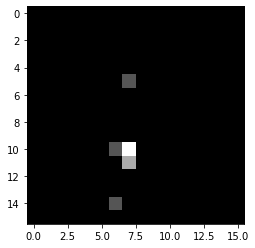

In [428]:
# operational with crop and create a list of 3d numpy arrays = num_of_frames x 2D frame

import matplotlib.pyplot as plt
%matplotlib inline

def to_uint8( data ) :
    # maximum pixel
    latch = np.zeros_like( data )
    latch[:] = 255
    # minimum pixel
    zeros = np.zeros_like( data )

    # unrolled to illustrate steps
    d = np.maximum( zeros, data )
    d = np.minimum( latch, d )

    # cast to uint8
    return np.asarray( d, dtype="uint8" )

num_of_mnist_symbols=6000
original_frame_size=32

# ----------Input parameters:--------
max_num_of_frames=100
# max_num_of_frames=10
frame_size=16
# -----------------------------------

crop_x_min=(original_frame_size-frame_size)//2+1+(original_frame_size-frame_size)%2
crop_x_max=original_frame_size-((original_frame_size-frame_size)//2+1)
crop_y_min=crop_x_min
crop_y_max=crop_x_max

list_np_fr_arr_on_off = []
list_np_fr_arr_on = []
list_np_fr_arr_off = []
# fr_ev_th=8
for mnist_sym in events:
    np_fr_arr_on_off=np.zeros((max_num_of_frames,frame_size,frame_size))
    np_fr_arr_on=np.zeros((max_num_of_frames,frame_size,frame_size))
    np_fr_arr_off=np.zeros((max_num_of_frames,frame_size,frame_size))
#     ev_cnt=[0,0,0]
#     fr_num=[0,0,0]
    ev_cnt=0
    fr_num=0
    for e in mnist_sym:
        x=e[1]-crop_x_min
        y=e[2]-crop_y_min
        if e[1]>=crop_x_min and e[1]<=crop_x_max and e[2]>=crop_y_min and e[2]<=crop_y_max:
#             np_fr_arr_on_off[fr_num[0], (frame_size-1)-y,x]=np_fr_arr_on_off[fr_num[0], (frame_size-1)-y,x]+1
            np_fr_arr_on_off[fr_num, (frame_size-1)-y,x]=np_fr_arr_on_off[fr_num, (frame_size-1)-y,x]+1
            if e[3]==1:
#                 if ev_cnt[1]>=fr_ev_th-1 and fr_num[1]<max_num_of_frames-1:
#                     fr_num[1]+=1
#                     ev_cnt[1]=0
#                 else:
#                     ev_cnt[1]+=1
#                 np_fr_arr_on[fr_num[1], (frame_size-1)-y,x]=np_fr_arr_on[fr_num[1], (frame_size-1)-y,x]+1
                np_fr_arr_on[fr_num, (frame_size-1)-y,x]=np_fr_arr_on[fr_num, (frame_size-1)-y,x]+1
            else:
#                 if ev_cnt[2]>=fr_ev_th-1 and fr_num[2]<max_num_of_frames-1:
#                     fr_num[2]+=1
#                     ev_cnt[2]=0
#                 else:
#                     ev_cnt[2]+=1
#                 np_fr_arr_off[fr_num[2], (frame_size-1)-y,x]=np_fr_arr_off[fr_num[2], (frame_size-1)-y,x]+1
                np_fr_arr_off[fr_num, (frame_size-1)-y,x]=np_fr_arr_off[fr_num, (frame_size-1)-y,x]+1

#             if ev_cnt[0]>=fr_ev_th-1 and fr_num[0]<max_num_of_frames-1:
#                 fr_num[0]+=1
#                 ev_cnt[0]=0
#             else:
#                 ev_cnt[0]+=1
            if ev_cnt>=fr_ev_th-1 and fr_num<max_num_of_frames-1:
                fr_num+=1
                ev_cnt=0
            else:
                ev_cnt+=1
    
#     fr_num[0] += 1
#     fr_num[1] += 1
#     fr_num[2] += 1
    fr_num += 1
    
#     list_np_fr_arr_on_off.append(np_fr_arr_on_off[:fr_num[0],:,:])
#     list_np_fr_arr_on.append(np_fr_arr_on[:fr_num[1],:,:])
#     list_np_fr_arr_off.append(np_fr_arr_off[:fr_num[2],:,:])
    list_np_fr_arr_on_off.append(np_fr_arr_on_off[:fr_num,:,:])
    list_np_fr_arr_on.append(np_fr_arr_on[:fr_num,:,:])
    list_np_fr_arr_off.append(np_fr_arr_off[:fr_num,:,:])


# -----Testing parameters:----------    
frame_sample = 0
mnist_sym_relative_ind=0
# ----------------------------------

print(len(list_np_fr_arr_on_off))
print(y_train[mnist_sym_relative_ind])
print(type(list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:]))
print(list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:].shape)
image = list_np_fr_arr_on_off[mnist_sym_relative_ind][frame_sample,:,:]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

# Load and plot frame samples from the list of 6000 mnist symbol event frames

6000
0
<class 'numpy.ndarray'>
(4, 16, 16)


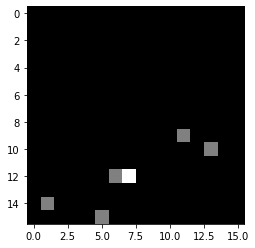

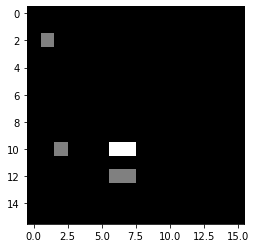

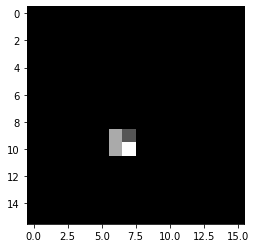

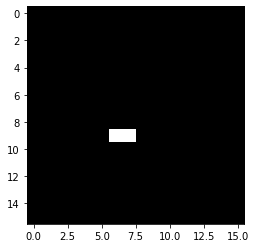

In [82]:
# mnist_sym_start=12000
frame_sample = 5
mnist_sym_relative_ind=2000
print(len(list_np_fr_arr_on_off))
print(y_train[mnist_sym_start+mnist_sym_relative_ind])
print(type(list_np_fr_arr_on[mnist_sym_relative_ind]))
print(list_np_fr_arr_on[mnist_sym_relative_ind].shape)
for frame_sample in range(list_np_fr_arr_on[mnist_sym_relative_ind].shape[0]):
    image = list_np_fr_arr_on[mnist_sym_relative_ind][frame_sample,:,:]
    # plot the sample
    fig = plt.figure
    plt.imshow(image, cmap='gray')
    plt.show()

# Save recorded events numpy frame lists to .pickle file

In [249]:
import pickle

list_np_fr=[list_np_fr_arr_on_off,list_np_fr_arr_on,list_np_fr_arr_off]
f_path='./'
f_name='mnist_'+str(mnist_sym_start)+'_'+str(mnist_sym_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'wb') as f:
    pickle.dump(list_np_fr, f)

In [429]:
list_np_fr_6000=[list_np_fr_arr_on_off,list_np_fr_arr_on,list_np_fr_arr_off]

# Load recorded events list from .pickle file

In [262]:
import pickle

mnist_start = 12000
mnist_end = 17999

f_path='./'
f_name='mnist_'+str(mnist_start)+'_'+str(mnist_end)+'_list_np_fr_'+str(frame_size)+'_ev_th_'+str(fr_ev_th)+'.pkl'
full_path=f_path+f_name
with open(full_path, 'rb') as f:
    list_np_fr_6000 = pickle.load(f)
    
    

In [412]:
list_np_fr_6000[0][869]

array([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 2

In [430]:
# list_np_fr = [[] for i in range(3)]

mnist_sym_start=0
mnist_sym_end=11999

In [431]:
for i in range(3):
    for frames in list_np_fr_6000[i]:
        list_np_fr[i].append(frames)


In [432]:
len(list_np_fr[0])

12000

# Load and plot frame samples from the list of 6000 mnist symbol event frames

7


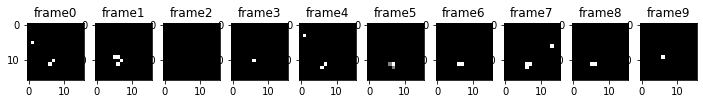

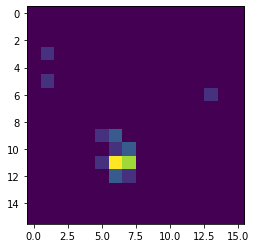

In [435]:
# frame_sample = 1
mnist_sym_relative_ind=7001
on_off = 2# 0-both,1-on,2-off
print(y_train[mnist_sym_start+mnist_sym_relative_ind])
# print(len(list_np_fr[1]))

frames_n = list_np_fr[on_off][mnist_sym_relative_ind].shape[0]
fig, axs = plt.subplots(1, frames_n, figsize=(12,4))
image_sum = np.zeros(list_np_fr[on_off][mnist_sym_relative_ind][0,:,:].shape)

for frame_sample in range(frames_n):
    image = list_np_fr[on_off][mnist_sym_relative_ind][frame_sample,:,:] # list_np_fr_arr_on on events only
    if frames_n>1:
        axs[frame_sample].imshow(image, cmap='gray')
        axs[frame_sample].set_title('frame'+str(frame_sample))
    else:
        axs.imshow(image, cmap='gray')
        axs.set_title('frame'+str(frame_sample))
    image_sum += image

plt.figure()
plt.imshow(image_sum)
# plt.savefig('frames_image3000.png')

In [276]:
#  generate single matrix with all events
on_off = 0

list_allevents = []
for indx, mnist_sample in enumerate(list_np_fr[on_off]):
    image_sum = np.zeros(mnist_sample[0,:,:].shape)
    for frame in mnist_sample:
        image_sum += frame
        
    list_allevents.append(image_sum[np.newaxis,:,:])

print(len(list_allevents))

18000


In [439]:
def dvs_generate_fr_dataset(list_np_fr, on_off = 0, ts = 6):
#     on_off = 3 # 0-both,1-on,2-off,3-on,off
#     ts = 10

    traj = np.zeros([ts,2])
    missing_frames_count = 0
    
    dvs_images = []
    trajectories = []
    
    for ind, samples in enumerate(list_np_fr):
        dimim = np.zeros([ts, frame_size, frame_size, 1])
        frames = np.min([ts,samples.shape[0]])
        dimim[-frames:,:,:,0] = samples[:frames,:,:]

#         if samples.shape[0] < ts:
#             missing_frames_count += 1
        
        dvs_images.append(dimim)
        trajectories.append(traj)
        
    # dvs_images = np.array(dvs_images)[:,:,:,:, np.newaxis]
    dvs_images = np.array(dvs_images)[:,:,:,:]
    trajectories = np.array(trajectories)
    x_dvs = (dvs_images, trajectories)
        
    return x_dvs

on_off = 1 # 0-both,1-on,2-off,3-on,off
ts = 6
first_mnist_indx = 0 # absolute- relative to mnist dataset
last_mnist_indx = 11999

used_sym_start = 6000 # relative- samples to use to build dataset
used_sym_end = 11999

y_train_aligned = y_train[first_mnist_indx:last_mnist_indx]
val_n = 500
rand_perm = np.random.permutation(range(used_sym_start, used_sym_end))
train_ind = rand_perm[0:-val_n]
test_ind = rand_perm[-val_n:]

#train data
list_fr_train = [list_np_fr[on_off][i] for i in train_ind]
train_x_dvs = dvs_generate_fr_dataset(list_fr_train, on_off, ts)
train_y_dvs = y_train_aligned[train_ind]

#test data
list_fr_test = [list_np_fr[on_off][i] for i in test_ind]
test_x_dvs = dvs_generate_fr_dataset(list_fr_test, on_off, ts)
test_y_dvs = y_train_aligned[test_ind]

#second data set
on_off = 2 # 0-both,1-on,2-off,3-on,off
#train data
list_fr_train = [list_np_fr[on_off][i] for i in train_ind]
train_x_dvs_ = dvs_generate_fr_dataset(list_fr_train, on_off, ts)

#test data
list_fr_test = [list_np_fr[on_off][i] for i in test_ind]
test_x_dvs_ = dvs_generate_fr_dataset(list_fr_test, on_off, ts)



In [440]:
train_x_dvs_onoff = [[],[]]
train_x_dvs_onoff[0] = np.stack((train_x_dvs[0].squeeze(),train_x_dvs_[0].squeeze()),axis=4)
train_x_dvs_onoff[1] = train_x_dvs[1]

test_x_dvs_onoff = [[],[]]
test_x_dvs_onoff[0] = np.stack((test_x_dvs[0].squeeze(),test_x_dvs_[0].squeeze()),axis=4)
test_x_dvs_onoff[1] = test_x_dvs[1]


In [441]:
import keras_networks

rnn102 = keras_networks.rnn_model_102(n_timesteps=ts,
                                      lr=1e-3,dropout=0.0,
                                      rnn_type='gru',
                                      input_size=(frame_size, frame_size, 2),
                                      conv_fe=False)
  

print("Fit model on training data")
history = rnn102.fit(
            train_x_dvs_onoff,
            train_y_dvs,
            batch_size=128,
            epochs=10,
            # We pass some validation for
            # monitoring validation loss and metrics
            # at the end of each epoch
            validation_data=(test_x_dvs_onoff, test_y_dvs)) #

(?, 6, 514)
Fit model on training data
Train on 5499 samples, validate on 500 samples
Epoch 1/10
5499/5499 [==============================] - 5s 953us/sample - loss: 2.1085 - sparse_categorical_accuracy: 0.2950 - val_loss: 1.8199 - val_sparse_categorical_accuracy: 0.4180
Epoch 2/10
5499/5499 [==============================] - 2s 438us/sample - loss: 1.5398 - sparse_categorical_accuracy: 0.4841 - val_loss: 1.3511 - val_sparse_categorical_accuracy: 0.4820
Epoch 3/10
5499/5499 [==============================] - 3s 473us/sample - loss: 1.2081 - sparse_categorical_accuracy: 0.5872 - val_loss: 1.2308 - val_sparse_categorical_accuracy: 0.5400
Epoch 4/10
5499/5499 [==============================] - 2s 408us/sample - loss: 1.0636 - sparse_categorical_accuracy: 0.6410 - val_loss: 1.1511 - val_sparse_categorical_accuracy: 0.5800
Epoch 5/10
5499/5499 [==============================] - 3s 478us/sample - loss: 0.9685 - sparse_categorical_accuracy: 0.6703 - val_loss: 1.1200 - val_sparse_categorical_a

In [ ]:
f_path='./'

symbols_in_files= [[0, 5999], [6000, 11999], [12000, 17999]]
num_of_events = [[] for i in symbols_in_files]
for i, symbols in enumerate(symbols_in_files):
    
    f_name='mnist_'+str(symbols[0])+'_'+str(symbols[1])+'.pkl'
    full_path=f_path+f_name
    with open(full_path, 'rb') as f:
        events = pickle.load(f)
    
    for sym in events:
        num_of_events[i].append(len(sym))
        
    

In [ ]:
plt.figure()
# plt.hist([num_of_events[0], num_of_events[1], num_of_events[2]], density = True)
plt.hist(num_of_events[0], density = True)

#  plt.figure()
plt.hist(num_of_events[1], alpha=0.6, density=True)

# plt.figure()
plt.hist(num_of_events[2], alpha = 0.6, density=True)

In [442]:
print(tf.__version__)

1.15.0
